In [1]:
# Imports.
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [2]:
# Logistic function
def logistic(r, x):
    return r * x * (1 - x)

Text(0.5, 1.0, 'Logistic Function with r=2')

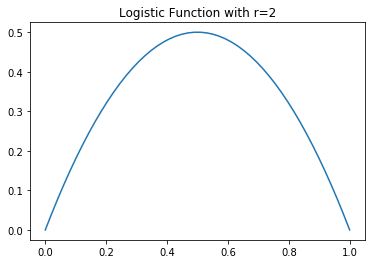

In [3]:
# Graphical representation of the function.
x = np.linspace(0, 1)
fig, ax = plt.subplots(1, 1)
ax.plot(x, logistic(2, x))
ax.set_title('Logistic Function with r=2')

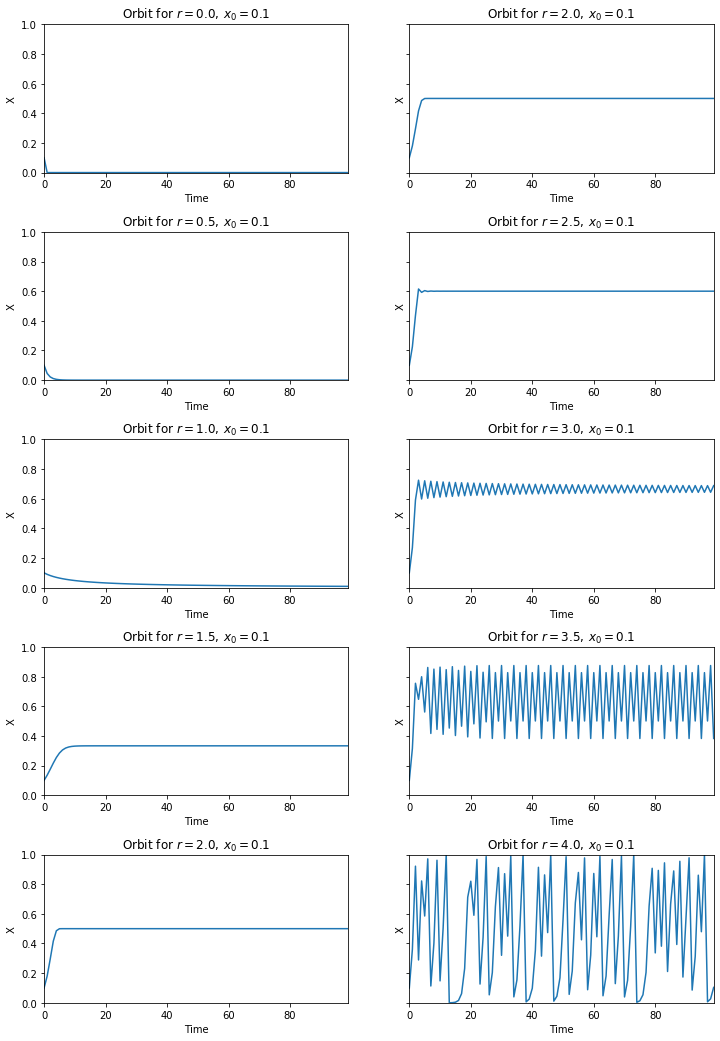

In [4]:
# Iterate the function for a given growth rate, and plot the results.
def logistic_equation_orbit(x0, r, iteration, ax=None):
    X = []
    T = []
    t = 0
    x = x0
    
    # Iterate the logistic equation, printing only after 'skip' steps.
    for i in range(iteration):
        X.append(x)
        T.append(t)
        t+=1
        x = logistic(r,x);
        
    ax.plot(T, X)
    ax.set_ylim(0, 1)
    ax.set_xlim(0, T[-1])
    ax.set_xlabel('Time')
    ax.set_ylabel('X')
    ax.set_title(f"Orbit for $r={r:.1f}, \, x_0={x0:.1f}$")

fig, axs = plt.subplots(5, 2, figsize=(12, 18), sharey=True)
plt.subplots_adjust(hspace=0.4)

# Varying from 0 to 2.
logistic_equation_orbit(0.1, 0.0, 100, ax=axs[0, 0])
logistic_equation_orbit(0.1, 0.5, 100, ax=axs[1, 0])
logistic_equation_orbit(0.1, 1.0, 100, ax=axs[2, 0])
logistic_equation_orbit(0.1, 1.5, 100, ax=axs[3, 0])
logistic_equation_orbit(0.1, 2.0, 100, ax=axs[4, 0])

# Varying from 2 to 4.
logistic_equation_orbit(0.1, 2.0, 100, ax=axs[0, 1])
logistic_equation_orbit(0.1, 2.5, 100, ax=axs[1, 1])
logistic_equation_orbit(0.1, 3.0, 100, ax=axs[2, 1])
logistic_equation_orbit(0.1, 3.5, 100, ax=axs[3, 1])
logistic_equation_orbit(0.1, 4.0, 100, ax=axs[4, 1])

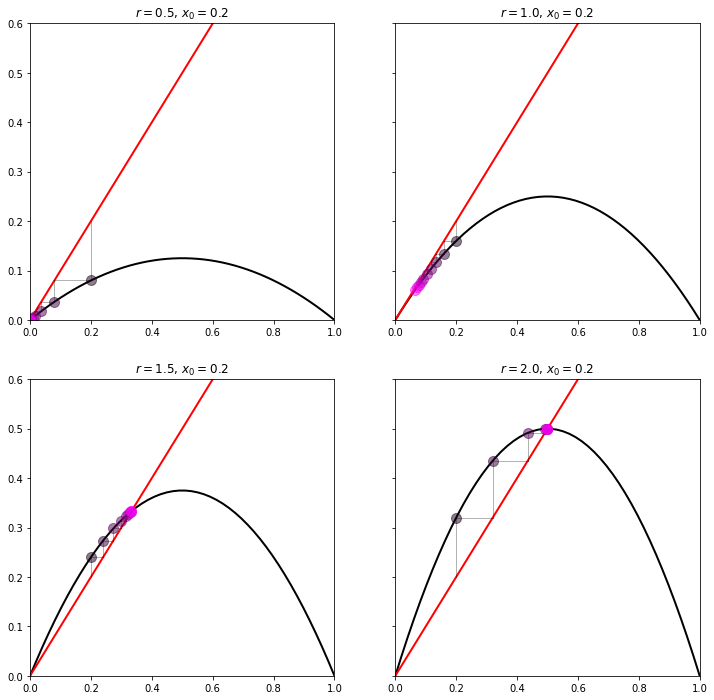

In [5]:
def plot_system(r, x0, n, ax=None):
    # Plot the function and the
    # y=x diagonal line.
    t = np.linspace(0, 1)
    ax.plot(t, logistic(r, t), 'k', lw=2)
    ax.plot([0, 1], [0, 1], 'r', lw=2)

    # Recursively apply logistic function.
    x = x0
    for i in range(n):
        y = logistic(r, x)
        
        # Plot the two lines.
        ax.plot([x, x], [x, y], 'k', alpha=0.3, lw=1)
        ax.plot([x, y], [y, y], 'k', alpha=0.3, lw=1)
        
        # Plot the positions with increasing saturation.
        ax.plot([x], [y], 'ok', ms=10, color=((i + 1)/n,0,(i + 1)/n, 1), alpha=0.5)
        x = y

    ax.set_xlim(0, 1)
    ax.set_ylim(0, 0.6)
    ax.set_title(f"$r={r:.1f}, \, x_0={x0:.1f}$")

fig, axs = plt.subplots(2, 2, figsize=(12, 12), sharey=True)

plot_system(0.5, .2, 10, ax=axs[0, 0])
plot_system(1.0, .2, 10, ax=axs[0, 1])
plot_system(1.5, .2, 10, ax=axs[1, 0])
plot_system(2.0, .2, 10, ax=axs[1, 1])

In [6]:
n = 10000
r = np.linspace(0.1, 4.0, n)

In [7]:
iterations = 1000
last = 200

In [8]:
x = 1e-5 * np.ones(n)

In [9]:
lyapunov = np.zeros(n)

Text(0.5, 1.0, 'Lyapunov Exponent\n')

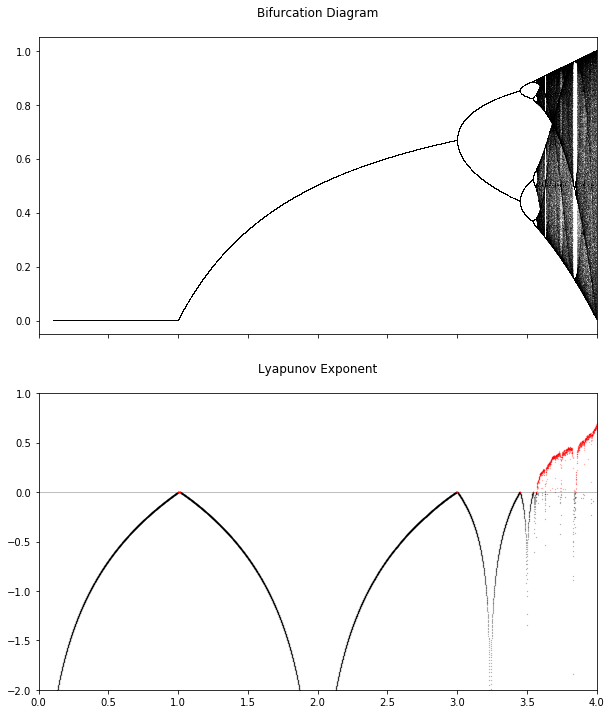

In [10]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12), sharex=True)

for i in range(iterations):
    x = logistic(r, x)
    
    # Compute the partial sum of the Lyapunov exponent.
    lyapunov += np.log(abs(r - 2 * r * x))
    
    # Display the bifurcation diagram.
    if i >= (iterations - last):
        ax1.plot(r, x, ',k', alpha=.1)
        
ax1.set_xlim(0, 4)
ax1.set_title("Bifurcation Diagram\n")

# Display the Lyapunov exponent, horizontal line.
ax2.axhline(0, color='k', lw=.5, alpha=.5)

# Negative Lyapunov exponent.
ax2.plot(r[lyapunov < 0], lyapunov[lyapunov < 0] / iterations, '.k', alpha=.5, ms=.5)

# Positive Lyapunov exponent.
ax2.plot(r[lyapunov >= 0], lyapunov[lyapunov >= 0] / iterations, '.r', alpha=.5, ms=.5)

ax2.set_xlim(0, 4)
ax2.set_ylim(-2, 1)
ax2.set_title("Lyapunov Exponent\n")

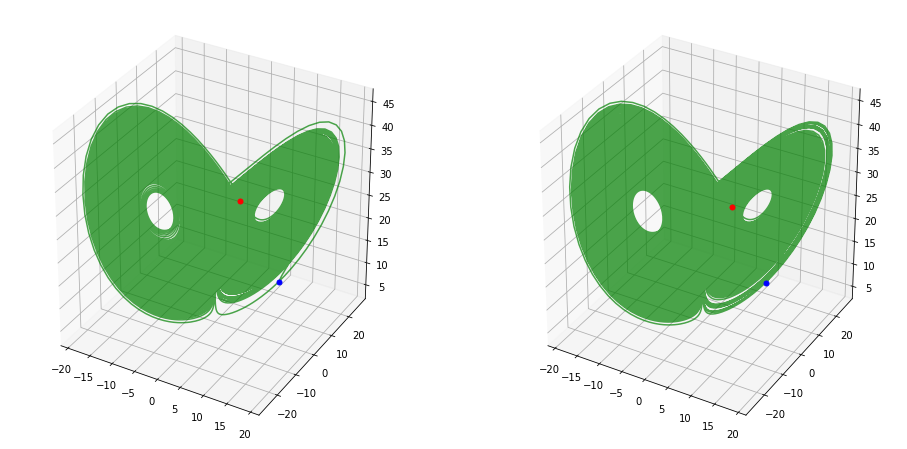

In [52]:
def f(state, t):
    x, y, z = state  # Unpack the state vector
    return sigma * (y - x), x * (rho - z) - y, x * y - beta * z  # Derivatives

def lorenz(rho = 28.0, 
           sigma = 10.0, 
           beta = 8.0 / 3.0, 
           state0 = [10.0, 10.0, 10.0],
           t = np.arange(0.0, 1000, 0.01),
           ax=None):

    states = odeint(f, state0, t)

    ax.plot(states[:, 0], states[:, 1], states[:, 2], color='g', alpha=0.7)

    # Starting point.
    ax.plot([10], [10], [10], 'ok', ms=5, color='b', alpha=1)

    # Ending point.
    ax.plot([states[int(states.size/3 - 1)][0]],  
            [states[int(states.size/3 - 1)][1]], 
            [states[int(states.size/3 - 1)][2]],'ok', ms=5, color='r', alpha=1)

fig = plt.figure(figsize=(16, 8))

ax0 = fig.add_subplot(1, 2, 1, projection='3d')
lorenz(ax=ax0)

ax1 = fig.add_subplot(1, 2, 2, projection='3d')
lorenz(ax=ax1, state0 = [10.0 + 0.00000001, 10.0, 10.0])

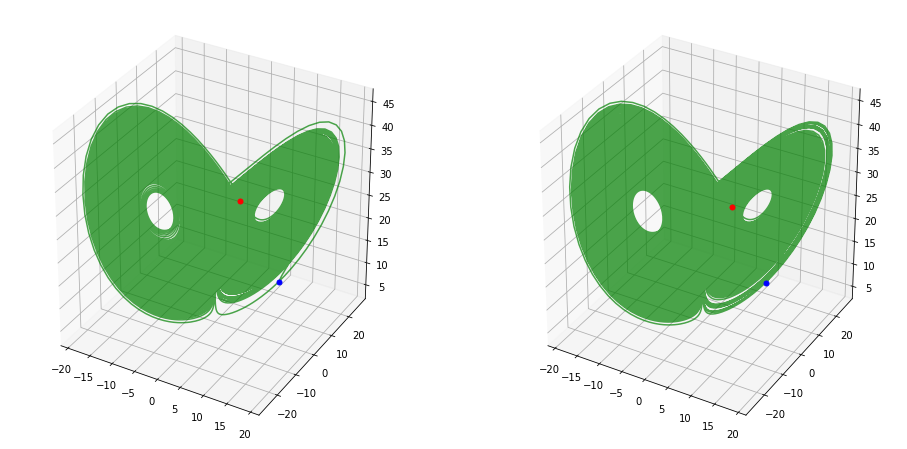

In [51]:
fig = plt.figure(figsize=(16, 8))

ax2 = fig.add_subplot(1, 2, 1, projection='3d')
lorenz(ax=ax2, rho = 0.5)

ax3 = fig.add_subplot(1, 2, 2, projection='3d')
lorenz(ax=ax3, rho = 0.5, state0 = [10.0 + 0.00000001, 10.0, 10.0])